# 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm
import seaborn as sns
import os
from scipy.signal import find_peaks


# 5.22

## 1. 实现b1500的export csv数据绘图

In [ ]:
def plot_output_csv(path, increase=False):
    # give file path, return plot
    fix_csv(path)
    df = pd.read_csv(path)
    v,I = df.iloc[259:,1], df.iloc[259:,3]
    v,I = pd.to_numeric(v, errors='coerce'), pd.to_numeric(I, errors='coerce')
    start = find_seq_start(v, increase=increase)
    fig, ax = plt.subplots()  
    ax.set_xlabel('Vd(V)')
    ax.set_ylabel('Id(A)')
    ax.invert_xaxis()
    ax.invert_yaxis()
    for i in range(len(start)-1):
        s,e = start[i], start[i+1]
        if s!=0:
            s = s+1
        ax.plot(v.iloc[s:e], I.iloc[s:e])

## 2. 实现b1500的export csv历史数据读取

In [ ]:
def get_output_csv(path, increase=False):
    fix_csv(path)
    df = pd.read_csv(path)
    v,I = df.iloc[259:,1], df.iloc[259:,3]
    v,I = pd.to_numeric(v, errors='coerce'), pd.to_numeric(I, errors='coerce')
    start = find_seq_start(v, increase=increase)
    datas= []
    for i in range(len(start)-1):
        s,e = start[i], start[i+1]
        if s!=0:
            s = s+1
        datas.append([v.iloc[s:e], I.iloc[s:e]])
    return datas
def history_output_csv(path):
    # give the folder path(contains s1c{x}.csv) 
    file = os.listdir(path)
    fig,axs = plt.subplots(4,6,figsize=(20,10))
    fig.suptitle('Benchmark History: Output curve')
    for i in range(1,7):
        # 找c_i
        ci = [j for j in file if 'c'+str(i) in j and '.csv' in j ]
        print(ci)
        for j in range(len(ci)):
            datas = get_output_csv(os.path.join(path,ci[j]))
            for k in range(len(datas)):
                axs[j,i-1].plot(datas[k][0], datas[k][1])


## 3. 分析单脉冲的电导响应
5 - 9 xlsx in 5.18, 使用4_2的plot gfmu进行修改 
（注意9.xlsx弄丢了）
在$10\mu s$时，脉冲开始失效（当然不同的晶体管可能会具有截然不同的表现）

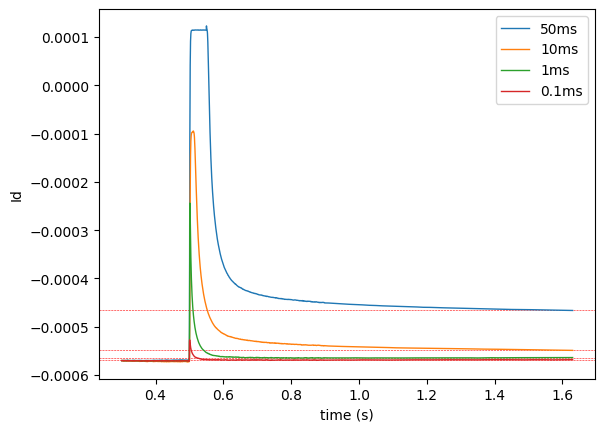

In [27]:
# print a1 WGFMU
def plot_WGFMU(file_path="A:\\project\\OECT\\b1500a\\2024_4_24\\1.xlsx", start=13, r=1, mode=' ', ax=None, label=None, init_i=0):
    '''4_2 version 修改版，输入ax，可以在同一张图上画多个WGFMU'''
    df = pd.read_excel(file_path)
    all = len(df) - start
    # x1, y1, y2    time, Vg, Id
    x1 = df.iloc[start:int(r*all),1].values
    y1 = df.iloc[start:int(r*all),2].values
    y2 = df.iloc[start:int(r*all),3].values
    # 平移到相同的初始电压平台
    offset = y2[0] - init_i
    y2 = y2 - offset
    # 绘制终点值的水平虚线
    if ax is not None:
        ax.axhline(y=y2[-1], color='r', linestyle='--', linewidth=0.4)
    ax.plot(x1, y2, label=label, linewidth=1) 

fig, ax1 = plt.subplots()
path = r'A:\project\OECT\b1500a\2024_5_18'
paths = [os.path.join(path,str(i)+'.xlsx') for i in [5,6,7,8]]
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Id')
para = ['50ms','10ms','1ms','0.1ms']
for i in range(len(paths)):
    plot_WGFMU(paths[i], start=13, r=1, ax=ax1, label=para[i], init_i = -0.00057)
ax1.legend()

## 4. 分析循环hgp and resume(5.12, repeat s0c2)
(?? 为什么电流这么大，ma级别了)

fix csv fileA:\project\OECT\b1500a\2024_5_18\repeat_s0c2\1_hgp.csv:
fix csv fileA:\project\OECT\b1500a\2024_5_18\repeat_s0c2\1_resume.csv:
fix csv fileA:\project\OECT\b1500a\2024_5_18\repeat_s0c2\2_hgp.csv:
fix csv fileA:\project\OECT\b1500a\2024_5_18\repeat_s0c2\2_resume.csv:
fix csv fileA:\project\OECT\b1500a\2024_5_18\repeat_s0c2\3_hgp.csv:
fix csv fileA:\project\OECT\b1500a\2024_5_18\repeat_s0c2\3_resume.csv:


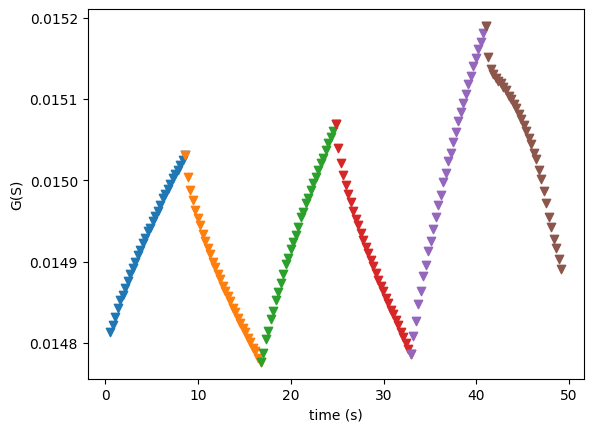

In [78]:
import csv
def fix_csv(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        reader = csv.reader(f)
        lines = list(reader)
    print(f"fix csv file{file_path}:")
    max_length = max(len(line) for line in lines)

    for line in lines:
        while len(line) < max_length:
            line.append('')

    with open(file_path, 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerows(lines)

def plot_WGFMU(file_path="A:\\project\\OECT\\b1500a\\2024_4_24\\1.xlsx", start=149, r=1, mode=' ', ax=None, step=0, init_i=0):
    '''4_2 version 修改版，输入ax，可以在同一张图上画多个WGFMU'''
    fix_csv(file_path)


    df = pd.read_csv(file_path)
    all = len(df) - start
    # x1, y1, y2    time, Vg, Id
    x1 = df.iloc[start:,1]
    y1 = df.iloc[start:,2]
    y2 = df.iloc[start:,3]
    x1,y1,y2 = pd.to_numeric(x1, errors='coerce').values, pd.to_numeric(y1, errors='coerce').values, pd.to_numeric(y2, errors='coerce').values
    x1 = x1 + step
    # 平移到上个电压平台
    if init_i == 0:
        init_i = y2[0]
    offset = y2[0] - init_i
    y2 = y2 - offset
    g = y2/(-0.25)
    plt.scatter(x1, g, marker='v')
    # ax.plot(x1, y2, linewidth=1, marker='o') 
    return (x1[-1]-x1[0]), y2[-1]

fig, ax1 = plt.subplots()
path = r'A:\project\OECT\b1500a\2024_5_18\repeat_s0c2'
paths = [os.path.join(path,str(i)+'.csv') for i in ['1_hgp','1_resume','2_hgp','2_resume','3_hgp','3_resume']]
ax1.set_xlabel('time (s)')
ax1.set_ylabel('G(S)')
sum_step,init_i = 0,0
for i in range(len(paths)):
    step, init_i= plot_WGFMU(paths[i], start=329, r=1, ax=ax1, step=sum_step, init_i=init_i)
    sum_step += step


# 以下为草稿

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm
import seaborn as sns
import os
from scipy.signal import find_peaks

import csv

def fix_csv(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        reader = csv.reader(f)
        lines = list(reader)
    print(f"fix csv file{file_path}:")
    max_length = max(len(line) for line in lines)

    for line in lines:
        while len(line) < max_length:
            line.append('')

    with open(file_path, 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerows(lines)


# 寻找循环序列起始点, 给定递增或递减
def find_seq_start(seq, increase=True):
    # Take a sequence and return the start index of each sequence
    seq = np.array(seq)
    seq_diff = np.diff(seq)
    if increase:
        start = np.where(seq_diff < 0)
    else:
        start = np.where(seq_diff > 0)
    start = start[0].tolist()
    if start[0] != 0:
        start.insert(0, 0) 
    return start
def plot_output(path, increase=False):
    df = pd.ExcelFile(path)
    sheets = df.sheet_names
    sheet = [i for i in sheets if 'List' in i][0]
    df = pd.read_excel(path, sheet_name=sheet)
    v,I = df.iloc[3:,0], df.iloc[3:,1]
    start = find_seq_start(v, increase=increase)
    fig, ax = plt.subplots()  
    ax.set_xlabel('Vd(V)')
    ax.set_ylabel('Id(A)')
    ax.invert_xaxis()
    ax.invert_yaxis()
    for i in range(len(start)-1):
        s,e = start[i], start[i+1]
        if s!=0:
            s = s+1
        ax.plot(v.iloc[s:e], I.iloc[s:e])
def plot_output_csv(path, increase=False):
    fix_csv(path)
    df = pd.read_csv(path)
    v,I = df.iloc[259:,1], df.iloc[259:,3]
    v,I = pd.to_numeric(v, errors='coerce'), pd.to_numeric(I, errors='coerce')
    start = find_seq_start(v, increase=increase)
    fig, ax = plt.subplots()  
    ax.set_xlabel('Vd(V)')
    ax.set_ylabel('Id(A)')
    ax.invert_xaxis()
    ax.invert_yaxis()
    for i in range(len(start)-1):
        s,e = start[i], start[i+1]
        if s!=0:
            s = s+1
        ax.plot(v.iloc[s:e], I.iloc[s:e])

def get_output(path, increase=False):
    df = pd.ExcelFile(path)
    sheets = df.sheet_names
    sheet = [i for i in sheets if 'List' in i][0]
    df = pd.read_excel(path, sheet_name=sheet)
    v,I = df.iloc[3:,0], df.iloc[3:,1]
    
    start = find_seq_start(v, increase=increase)
    datas= []
    for i in range(len(start)-1):
        s,e = start[i], start[i+1]
        if s!=0:
            s = s+1
        datas.append([v.iloc[s:e], I.iloc[s:e]])
    return datas
def get_output_csv(path, increase=False):
    fix_csv(path)
    df = pd.read_csv(path)
    v,I = df.iloc[259:,1], df.iloc[259:,3]
    v,I = pd.to_numeric(v, errors='coerce'), pd.to_numeric(I, errors='coerce')
    start = find_seq_start(v, increase=increase)
    datas= []
    for i in range(len(start)-1):
        s,e = start[i], start[i+1]
        if s!=0:
            s = s+1
        datas.append([v.iloc[s:e], I.iloc[s:e]])
    return datas

def history_output(path):        
    file = os.listdir(path)
    fig,axs = plt.subplots(4,6,figsize=(20,10))
    fig.suptitle('Benchmark History: Output curve')
    for i in range(1,7):
        # 找c_i
        ci = [j for j in file if 'c'+str(i) in j ]
        for j in range(len(ci)):
            datas = get_output(os.path.join(path,ci[j]))
            for k in range(len(datas)):
                axs[j,i-1].plot(datas[k][0], datas[k][1])
def history_output_csv(path):
    file = os.listdir(path)
    fig,axs = plt.subplots(4,6,figsize=(20,10))
    fig.suptitle('Benchmark History: Output curve')
    for i in range(1,7):
        # 找c_i
        ci = [j for j in file if 'c'+str(i) in j and '.csv' in j ]
        print(ci)
        for j in range(len(ci)):
            datas = get_output_csv(os.path.join(path,ci[j]))
            for k in range(len(datas)):
                axs[j,i-1].plot(datas[k][0], datas[k][1])

['s11c1_output.csv']
fix csv fileA:\project\OECT\b1500a\benchmark\sample11\s11c1_output.csv:
['s11c2_output.csv']
fix csv fileA:\project\OECT\b1500a\benchmark\sample11\s11c2_output.csv:
['s11c3_output.csv']
fix csv fileA:\project\OECT\b1500a\benchmark\sample11\s11c3_output.csv:
['s11c4_output.csv']
fix csv fileA:\project\OECT\b1500a\benchmark\sample11\s11c4_output.csv:
['s11c5_output.csv']
fix csv fileA:\project\OECT\b1500a\benchmark\sample11\s11c5_output.csv:
['s11c6_output.csv']
fix csv fileA:\project\OECT\b1500a\benchmark\sample11\s11c6_output.csv:
[]
['s12c2_output.csv']
fix csv fileA:\project\OECT\b1500a\benchmark\sample12\s12c2_output.csv:
['s12c3_output.csv']
fix csv fileA:\project\OECT\b1500a\benchmark\sample12\s12c3_output.csv:
['s12c4_output.csv']
fix csv fileA:\project\OECT\b1500a\benchmark\sample12\s12c4_output.csv:
['s12c5_output.csv']
fix csv fileA:\project\OECT\b1500a\benchmark\sample12\s12c5_output.csv:
['s12c6_output.csv']
fix csv fileA:\project\OECT\b1500a\benchmark\s

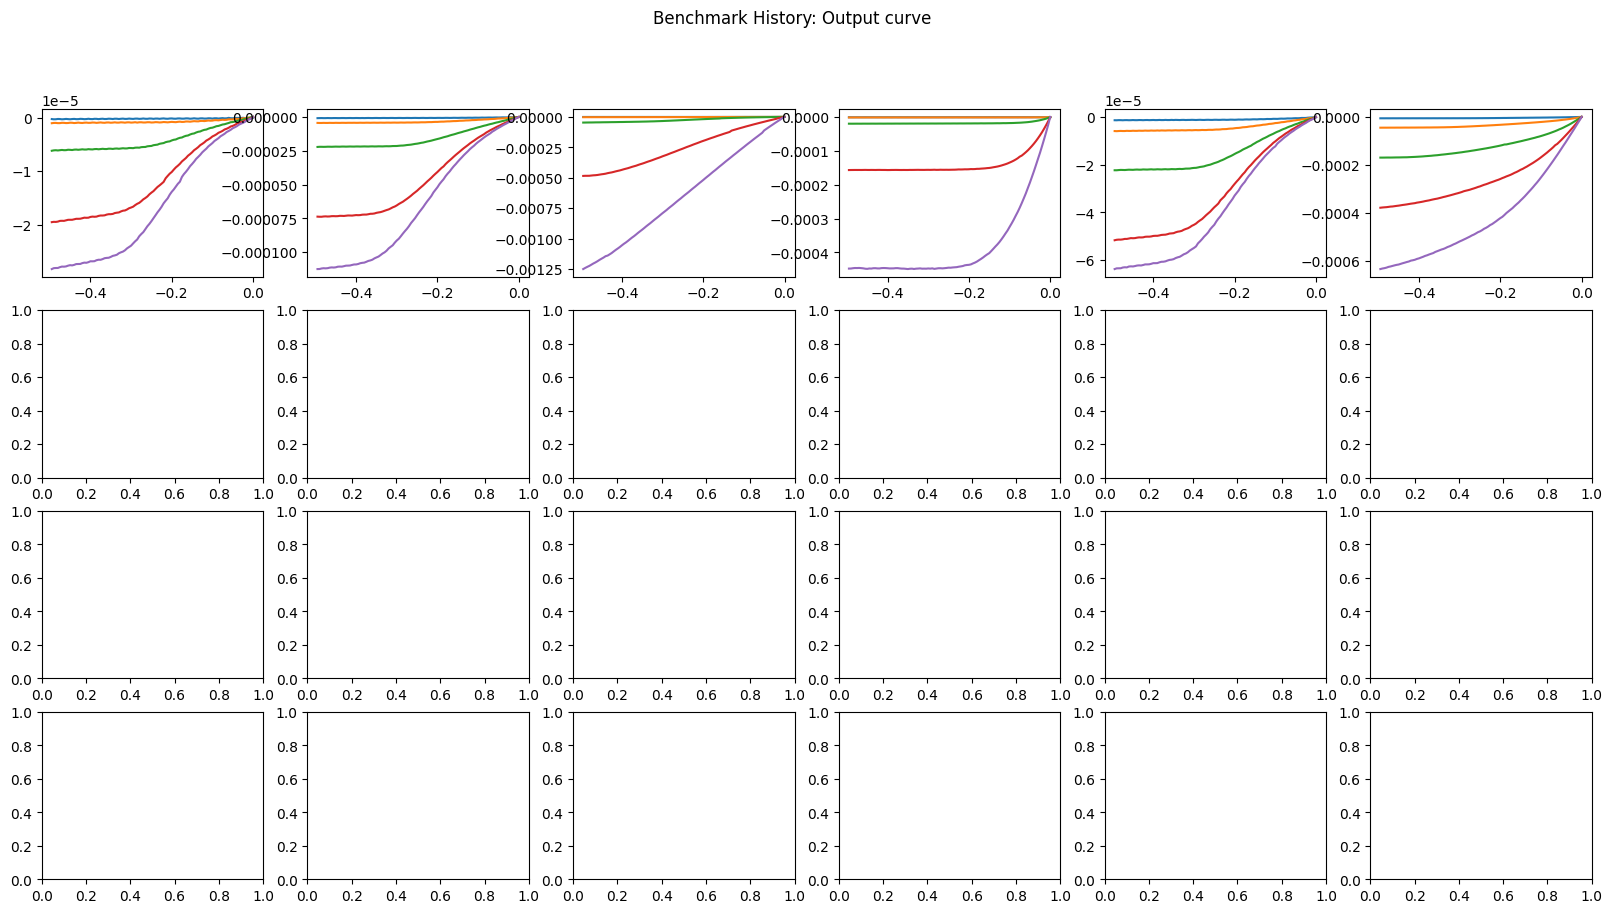

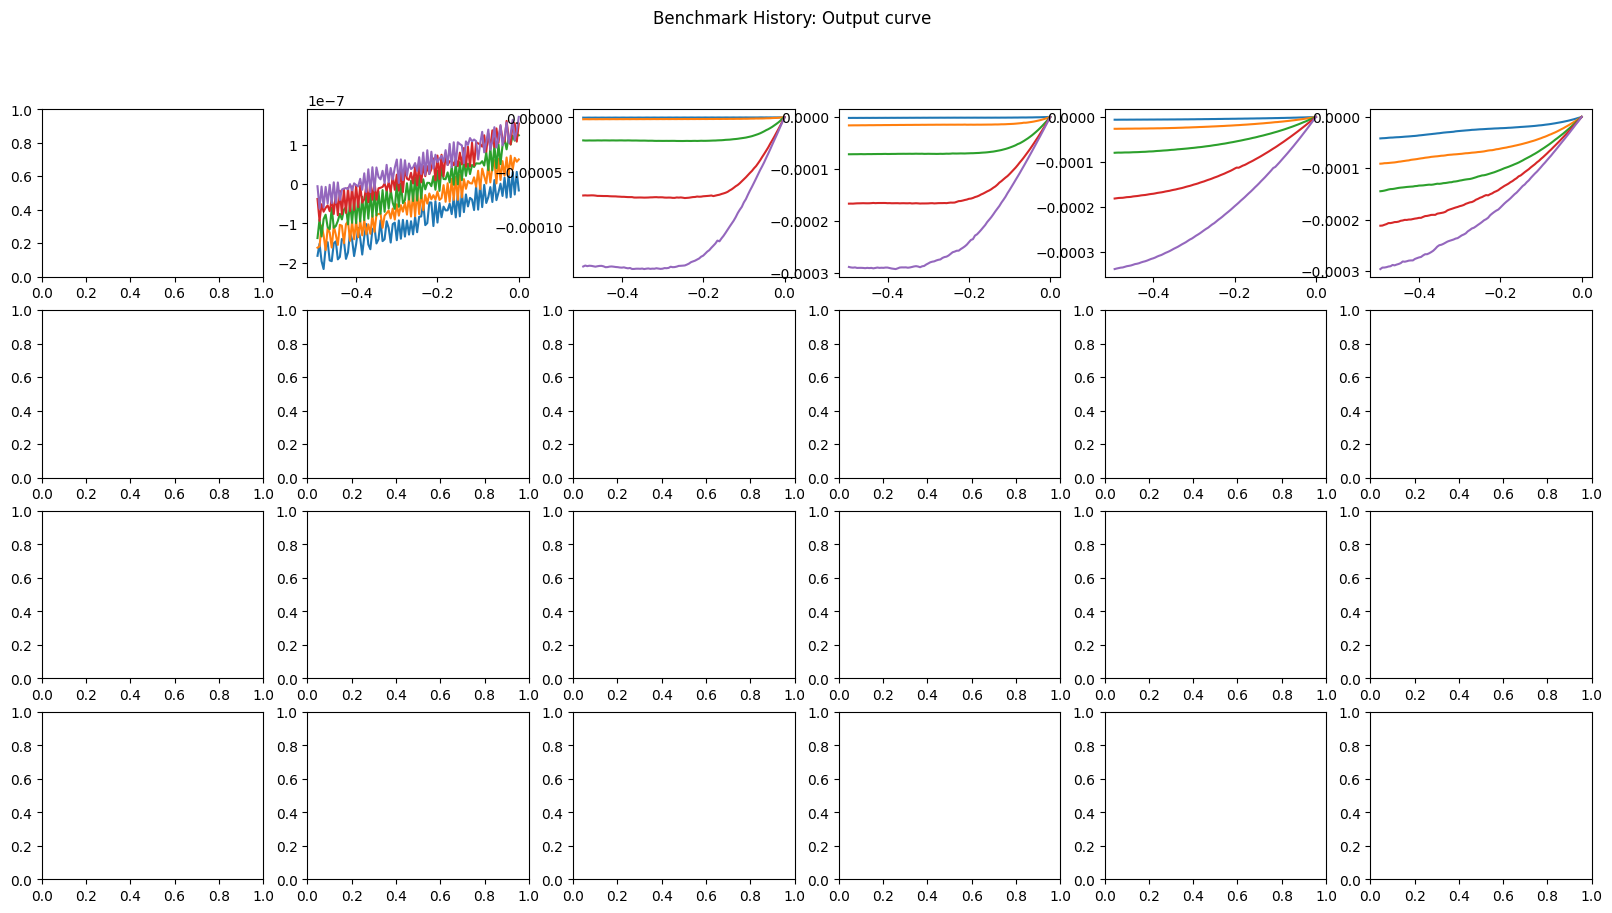

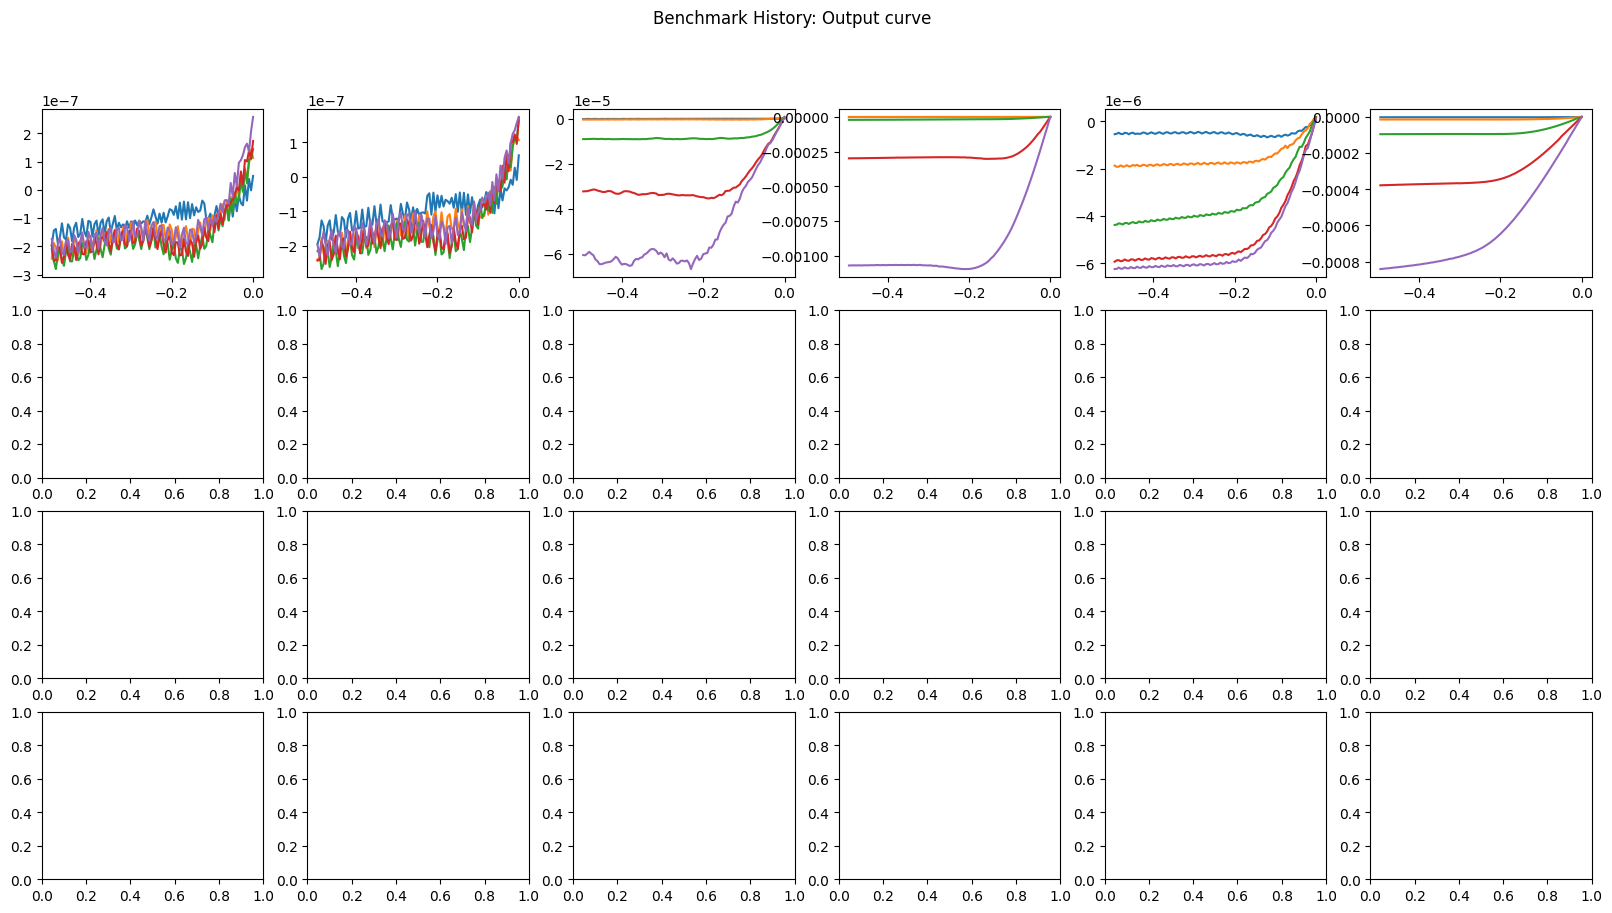

In [82]:
history_output_csv(r'A:\project\OECT\b1500a\benchmark\sample11')
history_output_csv(r'A:\project\OECT\b1500a\benchmark\sample12')
history_output_csv(r'A:\project\OECT\b1500a\benchmark\sample13')